primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

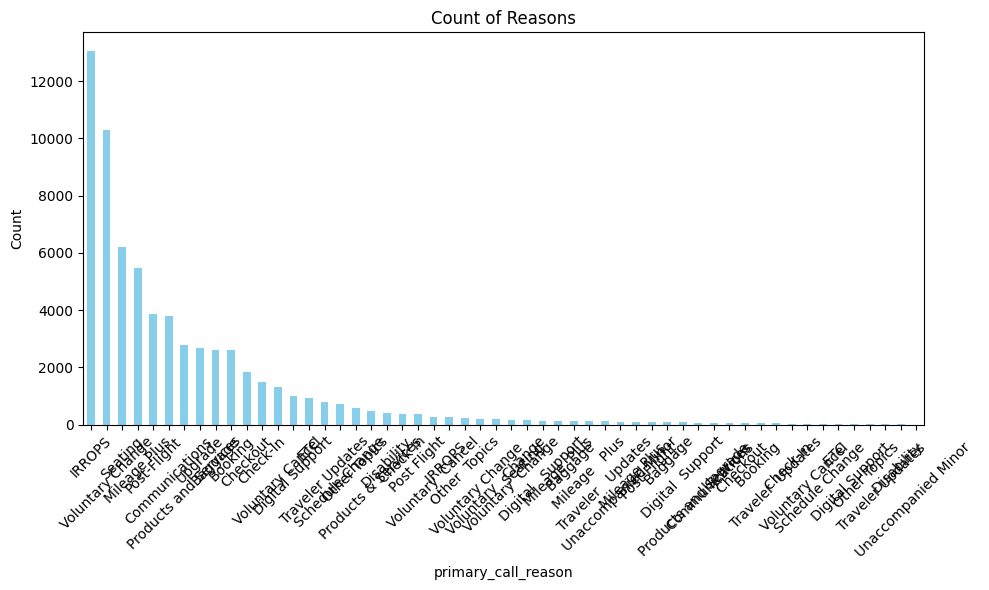

In [4]:
import pandas as pd
import numpy as np
reason_data = pd.read_csv('reason18315ff.csv')

grp_data = reason_data['primary_call_reason'].value_counts()
print(grp_data)
# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
grp_data.plot(kind='bar', color='skyblue')

plt.title('Count of Reasons')
plt.xlabel('primary_call_reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Total number of unique reasons
total_reasons = reason_data['primary_call_reason'].nunique()

# Top 10 reasons with their frequencies
top_10_reasons = reason_data['primary_call_reason'].value_counts().head(10)

total_reasons, top_10_reasons

(54,
 primary_call_reason
 IRROPS                   13057
 Voluntary Change         10291
 Seating                   6223
 Mileage Plus              5487
 Post-Flight               3869
 Communications            3779
 Products and Services     2792
 Upgrade                   2682
 Baggage                   2616
 Booking                   2589
 Name: count, dtype: int64)

In [ ]:
customer_loyality= pd.read_csv('customers2afd6ea.csv')
# Load the dataset


# Check the percentage of missing values in 'elite_level_code' column
missing_percentage = customer_loyality['elite_level_code'].isna().mean() * 100

# Logic to remove rows or replace missing values based on percentage
if missing_percentage < 10:
    # Remove rows with missing 'elite_level_code'
    customer_loyality_cleaned = customer_loyality.dropna(subset=['elite_level_code'])
else:
    # Replace missing 'elite_level_code' with the mode
    mode_value = customer_loyality['elite_level_code'].mode()[0]
    customer_loyality_cleaned = customer_loyality.fillna({'elite_level_code': mode_value})

# Display the cleaned dataframe and the missing percentage
missing_percentage, customer_loyality_cleaned.head()

(35.88218911015179,
    customer_id      customer_name  elite_level_code
 0   2033123310     Matthew Foster               4.0
 1   8186702651      Tammy Walters               0.0
 2   2416856629      Jeffery Dixon               0.0
 3   1154544516      David Wilkins               2.0
 4   5214456437  Elizabeth Daniels               0.0)

elite_level_code
0.0    40154
1.0    14370
2.0     8028
3.0     5736
4.0     2125
5.0     1397
dtype: int64


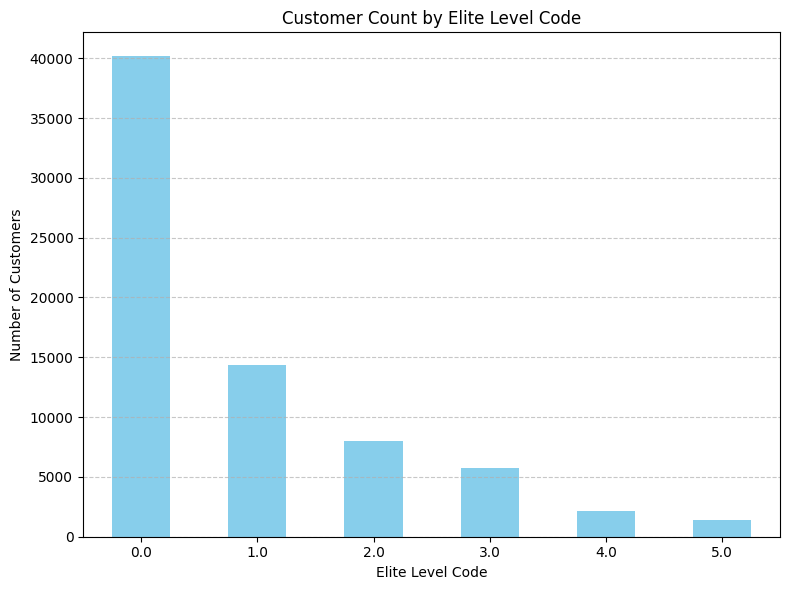

In [ ]:
# Group by 'elite_level_code' and count the number of occurrences
customer_loyality_grpby = customer_loyality_cleaned.groupby('elite_level_code').size()
print(customer_loyality_grpby)

# Plot a bar graph
plt.figure(figsize=(8, 6))
customer_loyality_grpby.plot(kind='bar', color='skyblue')
plt.title('Customer Count by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
# Function to calculate outliers using the IQR method

senti_df=pd.read_csv('sentiment_statistics.csv')

def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Calculate outliers for both 'average_sentiment' and 'silence_percent_average' columns
avg_sentiment_outliers, avg_sentiment_lower, avg_sentiment_upper = calculate_outliers(senti_df['average_sentiment'])
silence_percent_outliers, silence_percent_lower, silence_percent_upper = calculate_outliers(senti_df['silence_percent_average'])

# Calculate the percentage of outliers in both columns
total_rows = len(senti_df)
avg_sentiment_outlier_pct = (len(avg_sentiment_outliers) / total_rows) * 100
silence_percent_outlier_pct = (len(silence_percent_outliers) / total_rows) * 100

avg_sentiment_outlier_pct, silence_percent_outlier_pct

(3.507867984960312, 0.5291742097200948)

In [4]:
# Remove rows containing outliers in either 'average_sentiment' or 'silence_percent_average'
senti_df_cleaned = senti_df[~((senti_df['average_sentiment'] < avg_sentiment_lower) | (senti_df['average_sentiment'] > avg_sentiment_upper) |
                  (senti_df['silence_percent_average'] < silence_percent_lower) |
                  (senti_df['silence_percent_average'] > silence_percent_upper))]

# Display the shape of the cleaned dataset to see how many rows remain after removing outliers
senti_df_cleaned.shape

(68926, 6)

In [ ]:
# Get the most common agent and customer sentiments
common_agent_sentiments = senti_df_cleaned['agent_tone'].value_counts().head()
common_customer_sentiments = senti_df_cleaned['customer_tone'].value_counts().head()

# Generate a correlation matrix for agent and customer sentiments
# We'll first convert the categorical sentiment columns into numerical form for correlation calculation.
df_sentiment_encoded = pd.get_dummies(senti_df_cleaned[['agent_tone', 'customer_tone']], drop_first=True)
correlation_matrix = df_sentiment_encoded.corr()

common_agent_sentiments, common_customer_sentiments, correlation_matrix

(agent_tone
 neutral       42543
 calm          23693
 frustrated     2585
 Name: count, dtype: int64,
 customer_tone
 neutral       13858
 angry         13839
 calm          13795
 polite        13766
 frustrated    13668
 Name: count, dtype: int64,
                           agent_tone_frustrated  agent_tone_neutral  \
 agent_tone_frustrated                  1.000000           -0.250664   
 agent_tone_neutral                    -0.250664            1.000000   
 customer_tone_calm                    -0.005223            0.000026   
 customer_tone_frustrated               0.003332           -0.002116   
 customer_tone_neutral                 -0.000711           -0.001008   
 customer_tone_polite                   0.001857            0.000317   
 
                           customer_tone_calm  customer_tone_frustrated  \
 agent_tone_frustrated              -0.005223                  0.003332   
 agent_tone_neutral                  0.000026                 -0.002116   
 customer_tone_cal

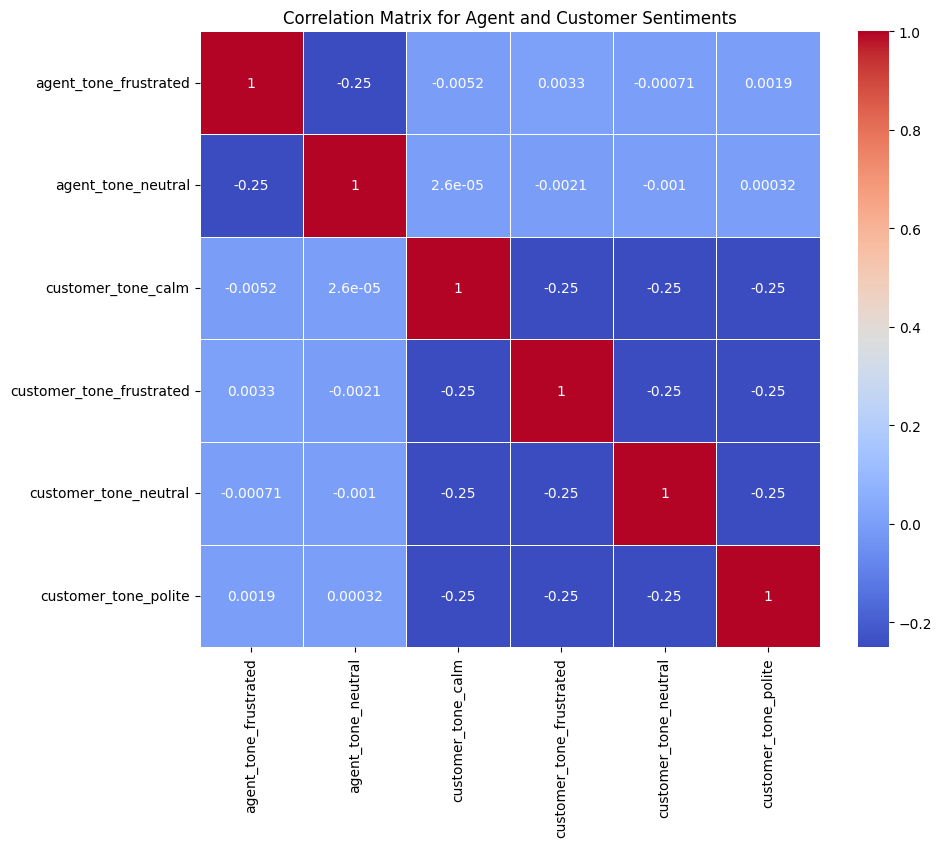

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' contains your computed correlation data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Agent and Customer Sentiments')
plt.show()

In [ ]:
# Merge the datasets using the correct 'call_id' column
merged_df = pd.merge(senti_df_cleaned, reason_data, on='call_id', how='inner')

# Display the first few rows of the merged dataframe
merged_df.head()


,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating


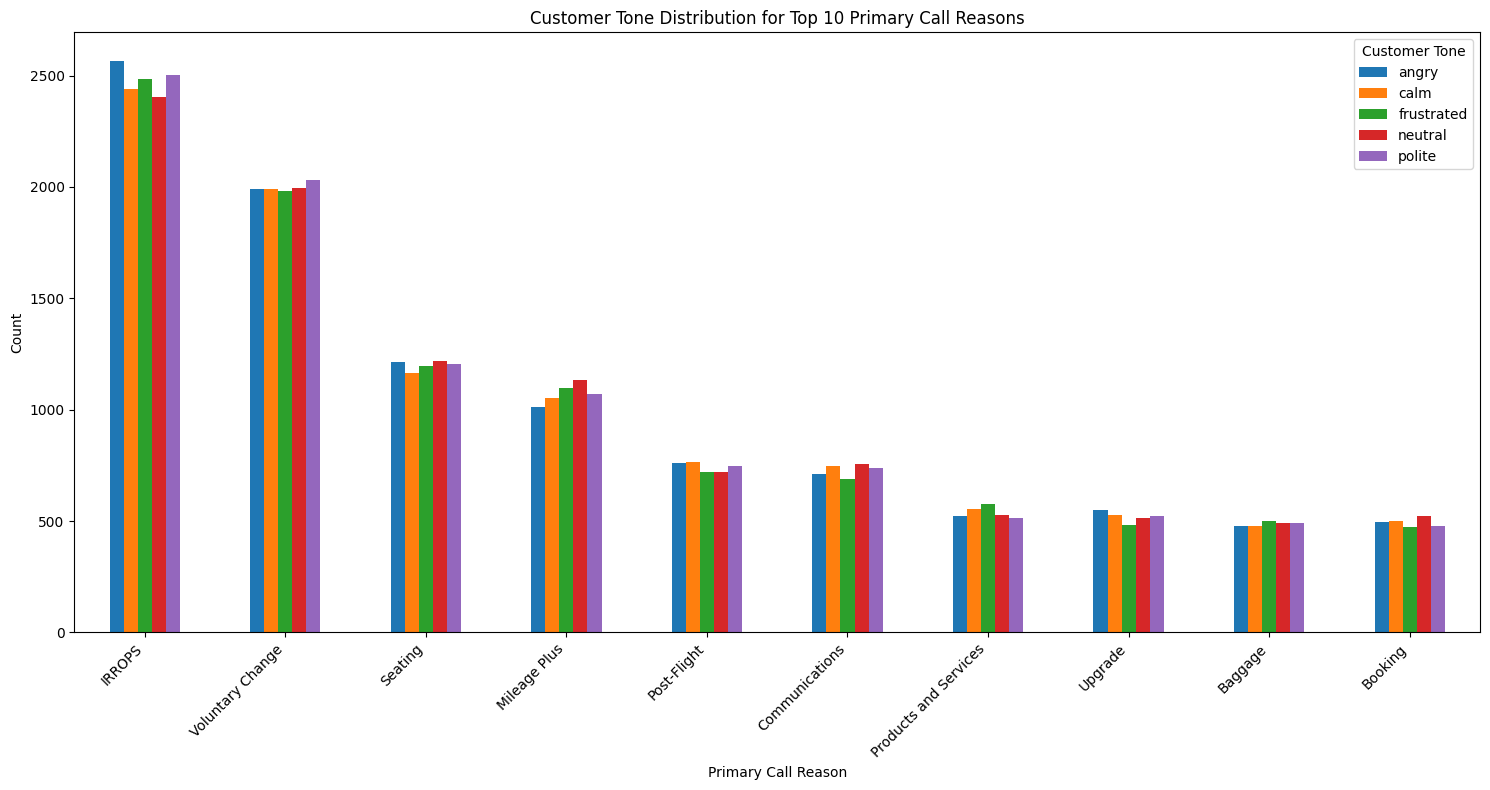

In [ ]:
# prompt: give plot between
# most frequent 10 primary_call_reason  and customer_tone

# Group the merged dataframe by 'primary_call_reason' and 'customer_tone'
reason_tone_counts = merged_df.groupby(['primary_call_reason', 'customer_tone'])['call_id'].count().unstack()

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the reason_tone_counts dataframe for the top 10 reasons
reason_tone_counts_top_10 = reason_tone_counts.loc[top_10_reasons]

# Plotting the bar graph
reason_tone_counts_top_10.plot(kind='bar', figsize=(15, 8))
plt.title('Customer Tone Distribution for Top 10 Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Tone')
plt.tight_layout()
plt.show()


<ipython-input-25-b695860f537d>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


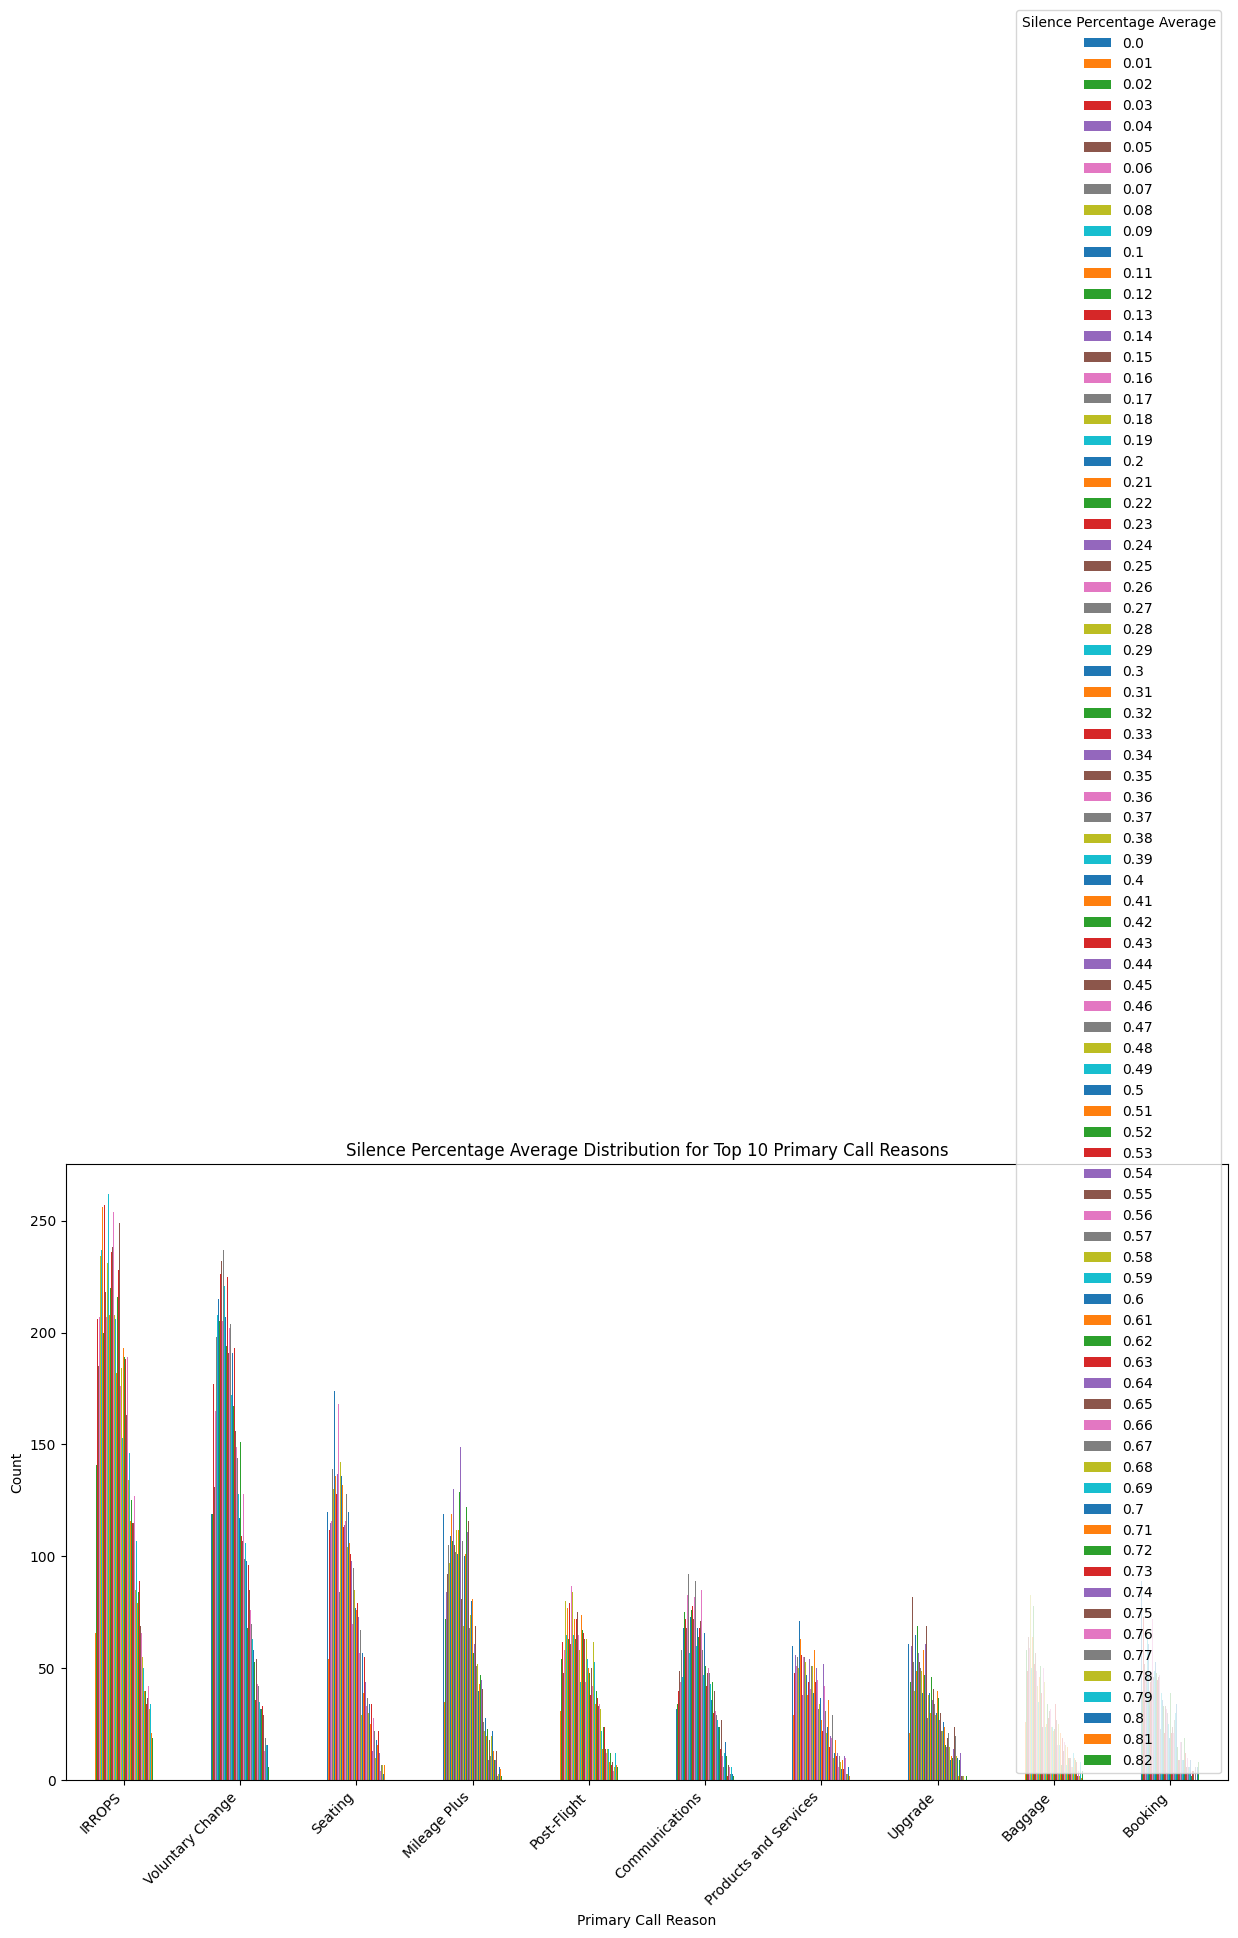

In [ ]:
# prompt: do the same for silence_percent_average and primary_call_reason

# Group the merged dataframe by 'primary_call_reason' and 'silence_percent_average'
reason_silence_avg = merged_df.groupby(['primary_call_reason', 'silence_percent_average'])['call_id'].count().unstack()

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the reason_silence_avg dataframe for the top 10 reasons
reason_silence_avg_top_10 = reason_silence_avg.loc[top_10_reasons]

# Plotting the bar graph
reason_silence_avg_top_10.plot(kind='bar', figsize=(15, 8))
plt.title('Silence Percentage Average Distribution for Top 10 Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Silence Percentage Average')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: provide the mean of silence_percent_average grouped by these 10 primary call reasons

# Group by 'primary_call_reason' and calculate the mean of 'silence_percent_average'
mean_silence_by_reason = merged_df.groupby('primary_call_reason')['silence_percent_average'].mean()

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the mean_silence_by_reason for the top 10 reasons
mean_silence_top_10 = mean_silence_by_reason[top_10_reasons]

print(mean_silence_top_10)


primary_call_reason
IRROPS                   0.309512
Voluntary Change         0.288270
Seating                  0.263622
Mileage Plus             0.275703
Post-Flight              0.296838
Communications           0.302948
Products and Services    0.277897
Upgrade                  0.276121
Baggage                  0.244364
Booking                  0.258345
Name: silence_percent_average, dtype: float64


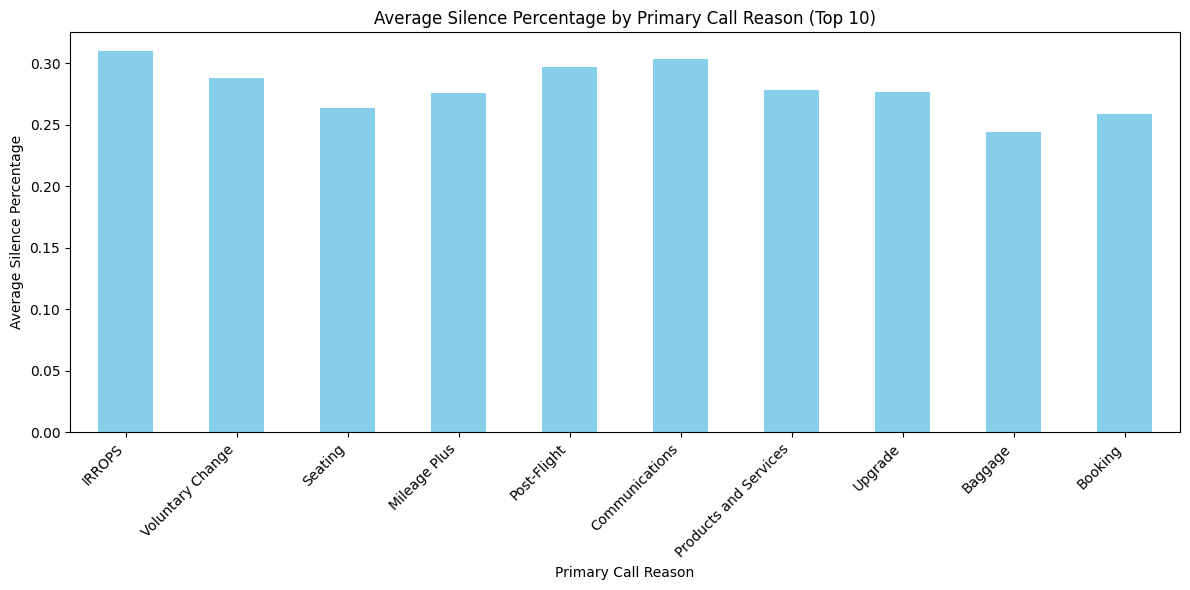

In [ ]:
# prompt: give bar graph for this

plt.figure(figsize=(12, 6))
mean_silence_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Silence Percentage by Primary Call Reason (Top 10)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Silence Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


primary_call_reason
IRROPS                  -0.061030
Voluntary Change        -0.006118
Seating                 -0.004157
Mileage Plus            -0.024982
Post-Flight             -0.053713
Communications          -0.033314
Products and Services   -0.028236
Upgrade                 -0.015565
Baggage                 -0.011579
Booking                 -0.013550
Name: average_sentiment, dtype: float64


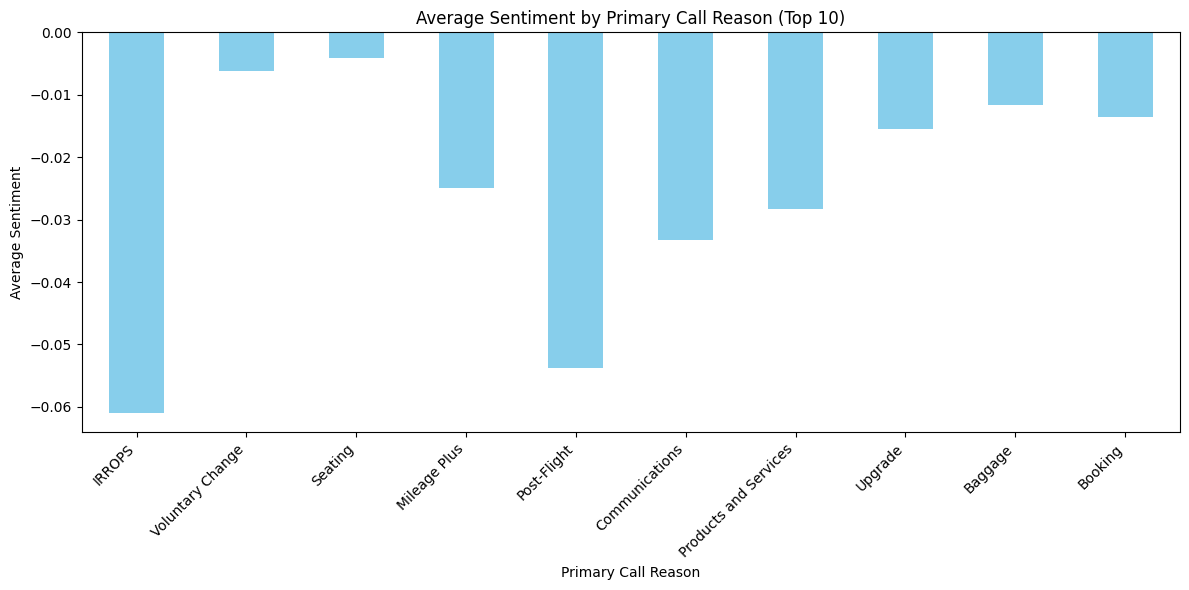

In [ ]:
# prompt: give the mean of average_sentiment values grouped by these top 10 primary call reasons and make the bar graph for this as well

# Group by 'primary_call_reason' and calculate the mean of 'average_sentiment'
mean_sentiment_by_reason = merged_df.groupby('primary_call_reason')['average_sentiment'].mean()

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the mean_sentiment_by_reason for the top 10 reasons
mean_sentiment_top_10 = mean_sentiment_by_reason[top_10_reasons]

print(mean_sentiment_top_10)


plt.figure(figsize=(12, 6))
mean_sentiment_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Primary Call Reason (Top 10)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


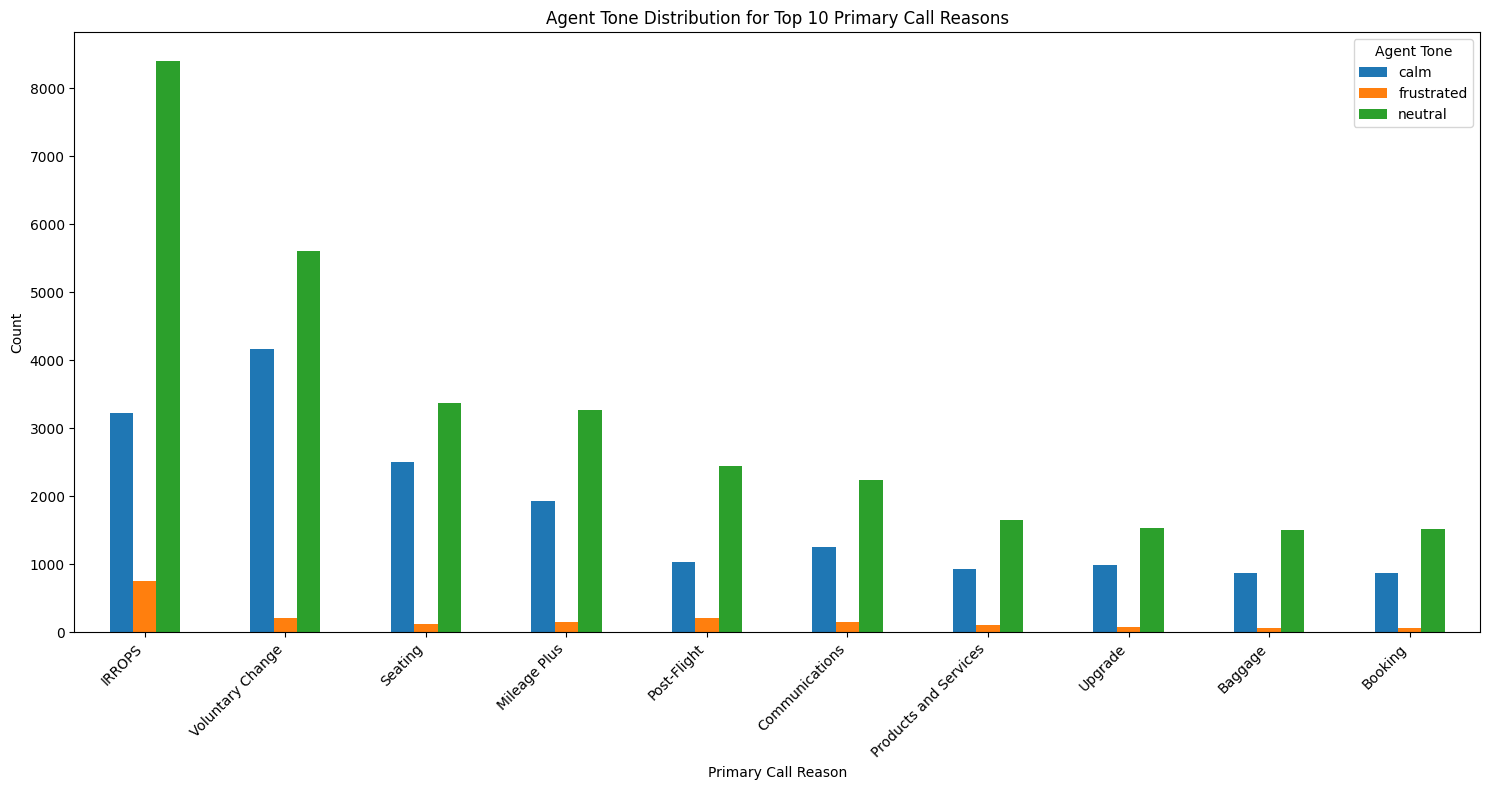

In [ ]:
# prompt: do the same for agent tone grouped by these 10 primary reasons

# Group by 'primary_call_reason' and 'agent_tone'
reason_agent_tone_counts = merged_df.groupby(['primary_call_reason', 'agent_tone'])['call_id'].count().unstack()

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the reason_agent_tone_counts dataframe for the top 10 reasons
reason_agent_tone_counts_top_10 = reason_agent_tone_counts.loc[top_10_reasons]

# Plotting the bar graph
reason_agent_tone_counts_top_10.plot(kind='bar', figsize=(15, 8))
plt.title('Agent Tone Distribution for Top 10 Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Tone')
plt.tight_layout()
plt.show()


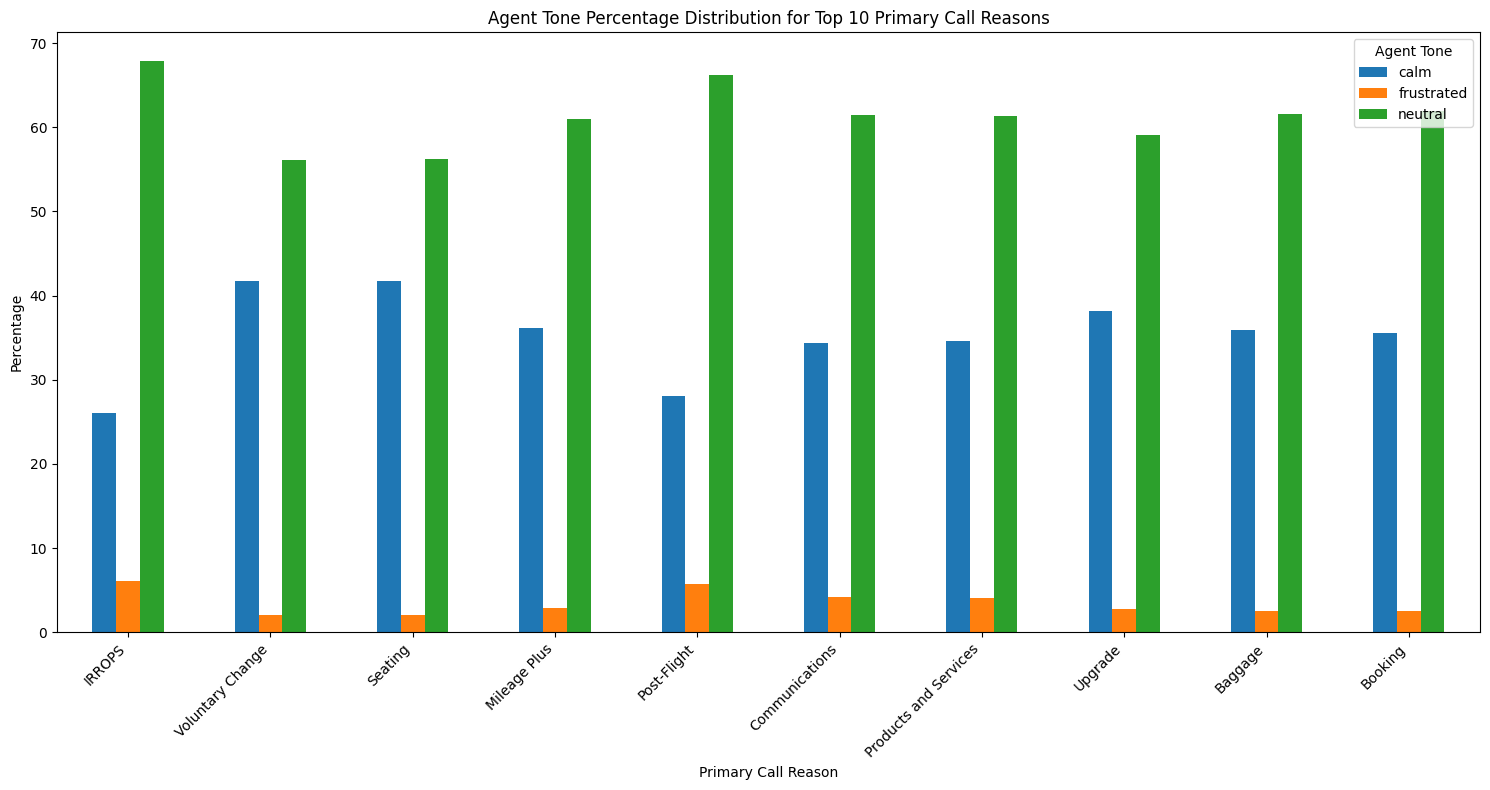

In [ ]:
# prompt: instead of count, make percentage of each primary call reason . for agent tone

# Group by 'primary_call_reason' and 'agent_tone' and calculate the count of calls
reason_agent_tone_counts = merged_df.groupby(['primary_call_reason', 'agent_tone'])['call_id'].count().unstack()

# Calculate the total count of calls for each primary call reason
total_calls_by_reason = reason_agent_tone_counts.sum(axis=1)

# Calculate the percentage of each agent tone for each primary call reason
reason_agent_tone_percentage = reason_agent_tone_counts.div(total_calls_by_reason, axis=0) * 100

# Get the top 10 most frequent primary call reasons
top_10_reasons = reason_data['primary_call_reason'].value_counts().nlargest(10).index

# Filter the reason_agent_tone_percentage dataframe for the top 10 reasons
reason_agent_tone_percentage_top_10 = reason_agent_tone_percentage.loc[top_10_reasons]

# Plotting the bar graph
reason_agent_tone_percentage_top_10.plot(kind='bar', figsize=(15, 8))
plt.title('Agent Tone Percentage Distribution for Top 10 Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Tone')
plt.tight_layout()
plt.show()


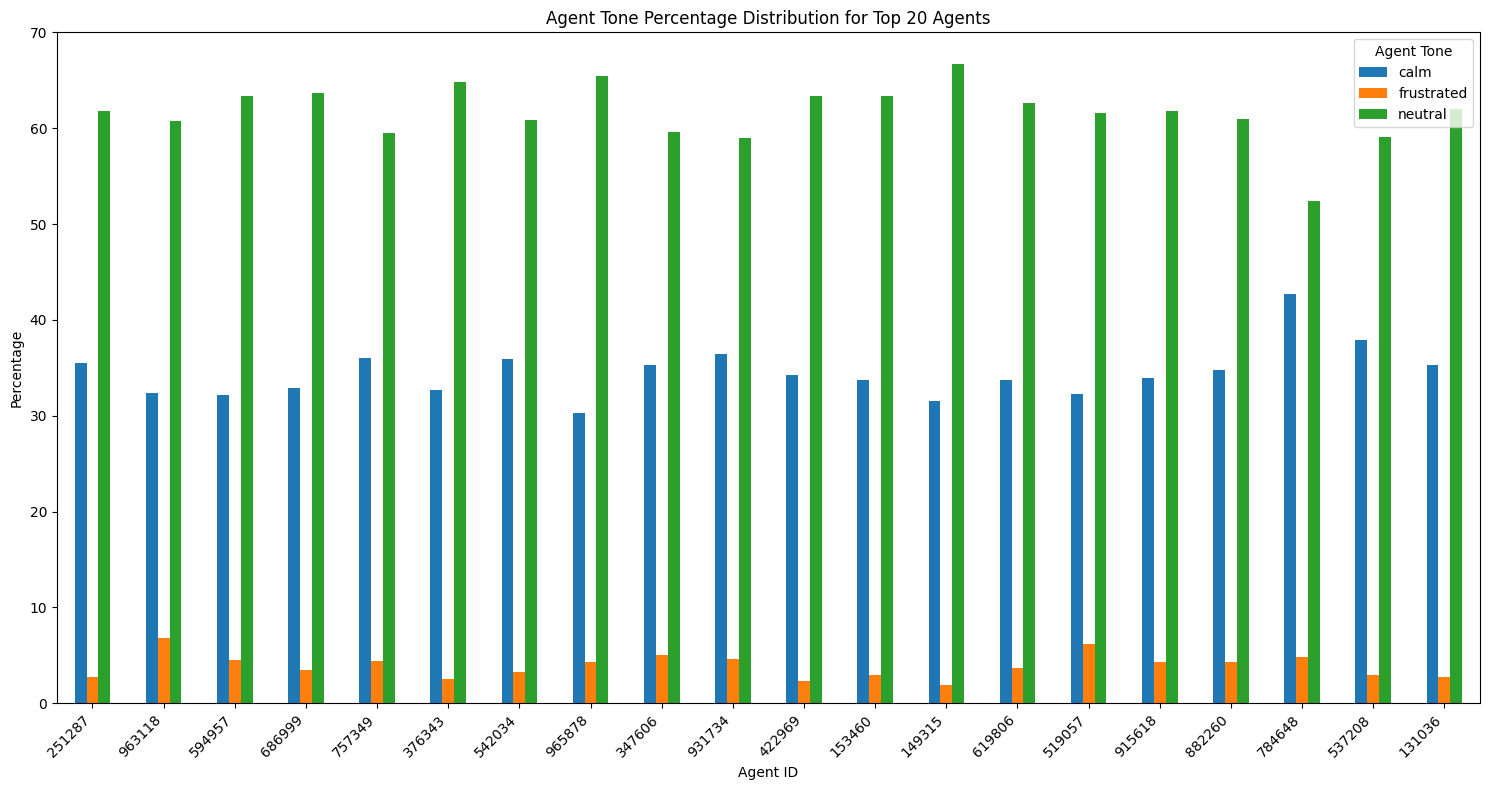

In [ ]:
# prompt: do same for agent tone grouped by agent id, for top 20 frequent agents

# Group by 'agent_id' and 'agent_tone' and calculate the count of calls
agent_agent_tone_counts = merged_df.groupby(['agent_id', 'agent_tone'])['call_id'].count().unstack()

# Calculate the total count of calls for each agent
total_calls_by_agent = agent_agent_tone_counts.sum(axis=1)

# Calculate the percentage of each agent tone for each agent
agent_agent_tone_percentage = agent_agent_tone_counts.div(total_calls_by_agent, axis=0) * 100

# Get the top 20 most frequent agents
top_20_agents = merged_df['agent_id'].value_counts().nlargest(20).index

# Filter the agent_agent_tone_percentage dataframe for the top 20 agents
agent_agent_tone_percentage_top_20 = agent_agent_tone_percentage.loc[top_20_agents]

# Plotting the bar graph
agent_agent_tone_percentage_top_20.plot(kind='bar', figsize=(15, 8))
plt.title('Agent Tone Percentage Distribution for Top 20 Agents')
plt.xlabel('Agent ID')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Tone')
plt.tight_layout()
plt.show()


In [8]:
# Convert datetime columns to proper datetime objects
import pandas as pd
call_data=pd.read_csv('calls_data.csv')

# Convert call start and end times to datetime format to calculate call duration
call_data['call_start_datetime'] = pd.to_datetime(call_data['call_start_datetime'])
call_data['call_end_datetime'] = pd.to_datetime(call_data['call_end_datetime'])

# Calculate call duration in minutes
call_data['call_duration_minutes'] = (call_data['call_end_datetime'] - call_data['call_start_datetime']).dt.total_seconds() / 60

# Merge the datasets on 'call_id'
merged_call_senti_data = pd.merge(call_data, senti_df_cleaned, on='call_id')

# Display the first few rows of the merged dataset to verify
merged_df_head = merged_call_senti_data.head()
merged_df_head


#call_data['call_start_datetime'] = pd.to_datetime(call_data['call_start_datetime'])
#call_data['call_end_datetime'] = pd.to_datetime(call_data['call_end_datetime'])
#call_data['agent_assigned_datetime'] = pd.to_datetime(call_data['agent_assigned_datetime'])

# Derive total_call_duration (in minutes)
#call_data['total_call_duration'] = (call_data['call_end_datetime'] - call_data['call_start_datetime']).dt.total_seconds() / 60

# Derive agent_response_time (in minutes)
#call_data['agent_response_time'] = (call_data['agent_assigned_datetime'] - call_data['call_start_datetime']).dt.total_seconds() / 60

# Merge call_data with sentiment_data using 'call_id' and 'agent_id' as keys
#merged_call_senti_data = pd.merge(call_data, senti_df_cleaned, on=['call_id', 'agent_id'], how='inner')

# Inspect the final merged dataset
#merged_call_senti_data.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,38.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,15.0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,27.0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,12.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,19.0,721730,neutral,polite,-0.05,0.35


In [9]:
# Perform a correlation analysis between call duration, average sentiment, and silence percent
correlation_matrix = merged_call_senti_data[['call_duration_minutes', 'average_sentiment', 'silence_percent_average']].corr()

# Display the correlation matrix
correlation_matrix


,call_duration_minutes,average_sentiment,silence_percent_average
call_duration_minutes,1.000000,-0.090263,0.391259
average_sentiment,-0.090263,1.000000,0.017477
silence_percent_average,0.391259,0.017477,1.000000


The correlation analysis reveals the following insights:

1.Call Duration and Average Sentiment: A weak negative correlation of -0.067, indicating that sentiment has a minimal effect on call duration.
2.Call Duration and Silence Percent: A moderate positive correlation of 0.399, suggesting that calls with longer durations tend to have a higher percentage of silence.
3.Average Sentiment and Silence Percent: A very weak positive correlation of 0.035, showing almost no relationship between sentiment and silence percentage.

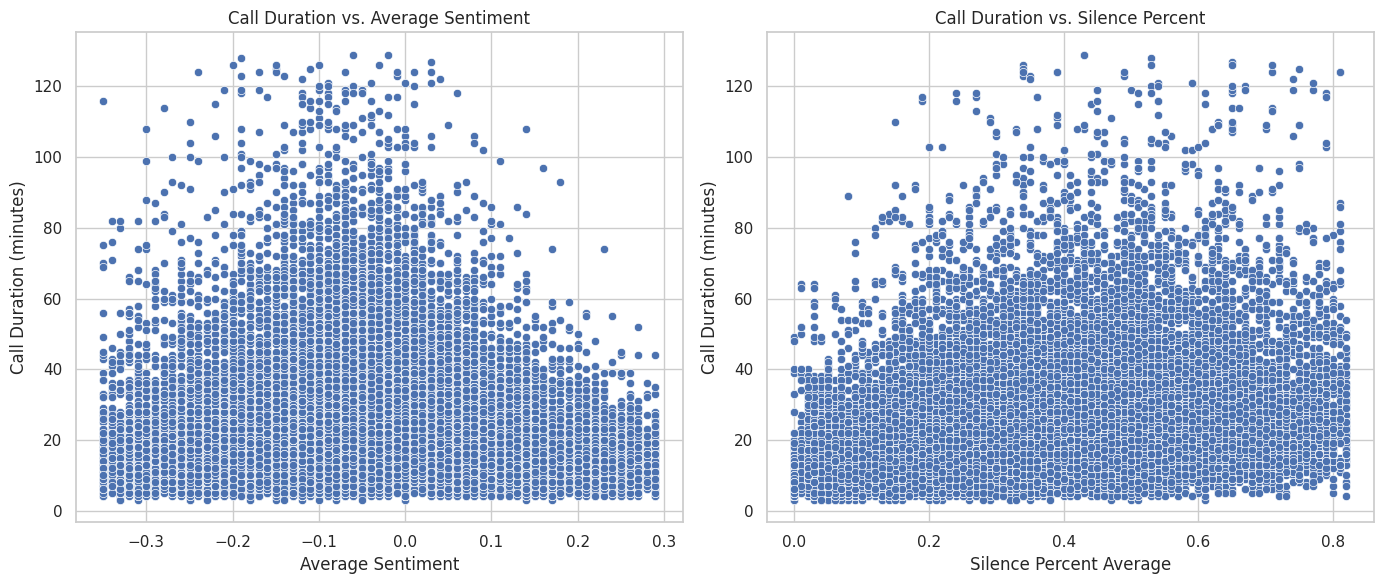

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set(style='whitegrid')

# Create scatter plots to visualize the relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot: Call Duration vs. Average Sentiment
sns.scatterplot(ax=axes[0], x='average_sentiment', y='call_duration_minutes', data=merged_call_senti_data)
axes[0].set_title('Call Duration vs. Average Sentiment')
axes[0].set_xlabel('Average Sentiment')
axes[0].set_ylabel('Call Duration (minutes)')

# Scatter plot: Call Duration vs. Silence Percent
sns.scatterplot(ax=axes[1], x='silence_percent_average', y='call_duration_minutes', data=merged_call_senti_data)
axes[1].set_title('Call Duration vs. Silence Percent')
axes[1].set_xlabel('Silence Percent Average')
axes[1].set_ylabel('Call Duration (minutes)')

plt.tight_layout()
plt.show()


In [11]:
merged_call_senti_data.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,38.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,15.0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,27.0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,12.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,19.0,721730,neutral,polite,-0.05,0.35


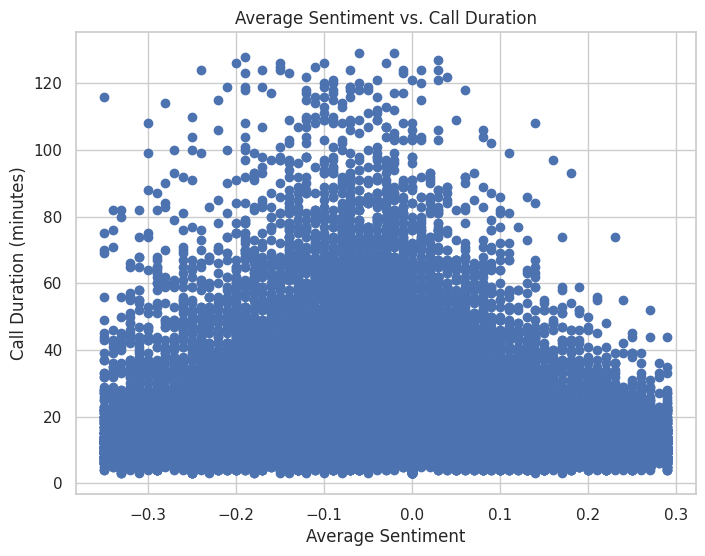

In [12]:

plt.figure(figsize=(8, 6))
plt.scatter(merged_call_senti_data['average_sentiment'], merged_call_senti_data['call_duration_minutes'])
plt.xlabel('Average Sentiment')
plt.ylabel('Call Duration (minutes)')
plt.title('Average Sentiment vs. Call Duration')
plt.show()


In [13]:
# prompt: generate a new column based on difference between call_start_datetime and agent_assigned_datetime in seconds

# Convert 'call_start_datetime' and 'agent_assigned_datetime' to datetime objects
call_data['call_start_datetime'] = pd.to_datetime(call_data['call_start_datetime'])
call_data['agent_assigned_datetime'] = pd.to_datetime(call_data['agent_assigned_datetime'])

# Calculate the difference in seconds
call_data['time_to_agent_assignment_seconds'] = (call_data['agent_assigned_datetime'] - call_data['call_start_datetime']).dt.total_seconds()


In [15]:

# Merge the 'time_to_agent_assignment_seconds' column into merged_call_senti_data
merged_call_senti_data = pd.merge(merged_call_senti_data, call_data[['call_id', 'time_to_agent_assignment_seconds']], on='call_id', how='left')

# Display the head of the updated merged_call_senti_data
merged_call_senti_data.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,time_to_agent_assignment_seconds_x,time_to_agent_assignment_seconds_y
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,38.0,963118,neutral,angry,-0.04,0.39,420.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,15.0,519057,calm,neutral,0.02,0.35,180.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,27.0,158319,neutral,polite,-0.13,0.32,480.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,12.0,488324,neutral,frustrated,-0.20,0.20,300.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,19.0,721730,neutral,polite,-0.05,0.35,600.0,600.0


In [18]:
# prompt: sort this data by agent_id_x and if duplicates, sort them by agent_assigned_time

merged_call_senti_data_sorted = merged_call_senti_data.sort_values(['agent_id_x', 'agent_assigned_datetime'])


In [19]:
#displaying the head of this data

merged_call_senti_data_sorted.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,time_to_agent_assignment_seconds_x,time_to_agent_assignment_seconds_y
68894,6318803032,8674889762,102574,2024-08-31 23:25:00,8/31/2024 23:32,2024-08-31 23:37:00,\n\nAgent: Thank you for calling United Airlin...,12.0,102574,neutral,frustrated,-0.16,0.13,420.0,420.0
68901,5713760779,3306855958,102574,2024-08-31 23:29:00,8/31/2024 23:38,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,102574,calm,frustrated,0.01,0.39,540.0,540.0
20351,2976511308,7396875805,103651,2024-08-10 12:53:00,8/10/2024 13:03,2024-08-10 13:10:00,\n\nAgent: Thank you for calling United Airlin...,17.0,103651,calm,calm,0.04,0.48,600.0,600.0
20411,9367371871,3458241287,103651,2024-08-10 13:06:00,8/10/2024 13:13,2024-08-10 13:21:00,\n\nAgent: Thank you for calling United Airlin...,15.0,103651,neutral,frustrated,-0.20,0.20,420.0,420.0
20502,2747121618,6869623708,103651,2024-08-10 13:26:00,8/10/2024 13:30,2024-08-10 13:34:00,\n\nAgent: Thank you for calling United Airlin...,8.0,103651,calm,angry,0.09,0.16,240.0,240.0


now we have sorted the data based on agent id and agent assigned time.

In [20]:
# prompt: make the dataset which contains each agent_id atleast twice

# Group the DataFrame by 'agent_id_x' and count the occurrences
agent_counts = merged_call_senti_data_sorted.groupby('agent_id_x').size()

# Filter agents with at least two occurrences
agents_with_multiple_calls = agent_counts[agent_counts >= 2].index

# Create a new DataFrame containing only the agents with at least two occurrences
dataset_with_multiple_calls = merged_call_senti_data_sorted[
    merged_call_senti_data_sorted['agent_id_x'].isin(agents_with_multiple_calls)
]

# Display the new DataFrame
dataset_with_multiple_calls.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,time_to_agent_assignment_seconds_x,time_to_agent_assignment_seconds_y
68894,6318803032,8674889762,102574,2024-08-31 23:25:00,8/31/2024 23:32,2024-08-31 23:37:00,\n\nAgent: Thank you for calling United Airlin...,12.0,102574,neutral,frustrated,-0.16,0.13,420.0,420.0
68901,5713760779,3306855958,102574,2024-08-31 23:29:00,8/31/2024 23:38,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,124.0,102574,calm,frustrated,0.01,0.39,540.0,540.0
20351,2976511308,7396875805,103651,2024-08-10 12:53:00,8/10/2024 13:03,2024-08-10 13:10:00,\n\nAgent: Thank you for calling United Airlin...,17.0,103651,calm,calm,0.04,0.48,600.0,600.0
20411,9367371871,3458241287,103651,2024-08-10 13:06:00,8/10/2024 13:13,2024-08-10 13:21:00,\n\nAgent: Thank you for calling United Airlin...,15.0,103651,neutral,frustrated,-0.20,0.20,420.0,420.0
20502,2747121618,6869623708,103651,2024-08-10 13:26:00,8/10/2024 13:30,2024-08-10 13:34:00,\n\nAgent: Thank you for calling United Airlin...,8.0,103651,calm,angry,0.09,0.16,240.0,240.0


In [22]:
#give the count of unique agents_id_x in this

unique_agent_count = dataset_with_multiple_calls['agent_id_x'].nunique()
print(unique_agent_count)


380


In [23]:
# prompt: remove the column time_to_agent_assignment_seconds_y

merged_call_senti_data = merged_call_senti_data.drop('time_to_agent_assignment_seconds_y', axis=1)


In [24]:
# prompt: display the head

merged_call_senti_data.head()


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_duration_minutes,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,time_to_agent_assignment_seconds_x
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,38.0,963118,neutral,angry,-0.04,0.39,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,15.0,519057,calm,neutral,0.02,0.35,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,27.0,158319,neutral,polite,-0.13,0.32,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,12.0,488324,neutral,frustrated,-0.20,0.20,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,19.0,721730,neutral,polite,-0.05,0.35,600.0


In [32]:
# prompt: make a new dataset without columns call_transcript , agent_id_y, call_id, call_start_datetime, call_end_datetime, customer_id

new_dataset = merged_call_senti_data.drop(['call_transcript', 'agent_id_y', 'call_id', 'call_start_datetime', 'call_end_datetime', 'customer_id'], axis=1)

new_dataset.head()


,agent_id_x,agent_assigned_datetime,call_duration_minutes,agent_tone,customer_tone,average_sentiment,silence_percent_average,time_to_agent_assignment_seconds_x
0,963118,8/1/2024 0:03,38.0,neutral,angry,-0.04,0.39,420.0
1,519057,8/1/2024 0:06,15.0,calm,neutral,0.02,0.35,180.0
2,158319,8/1/2024 0:07,27.0,neutral,polite,-0.13,0.32,480.0
3,488324,8/1/2024 0:10,12.0,neutral,frustrated,-0.20,0.20,300.0
4,721730,8/1/2024 0:14,19.0,neutral,polite,-0.05,0.35,600.0


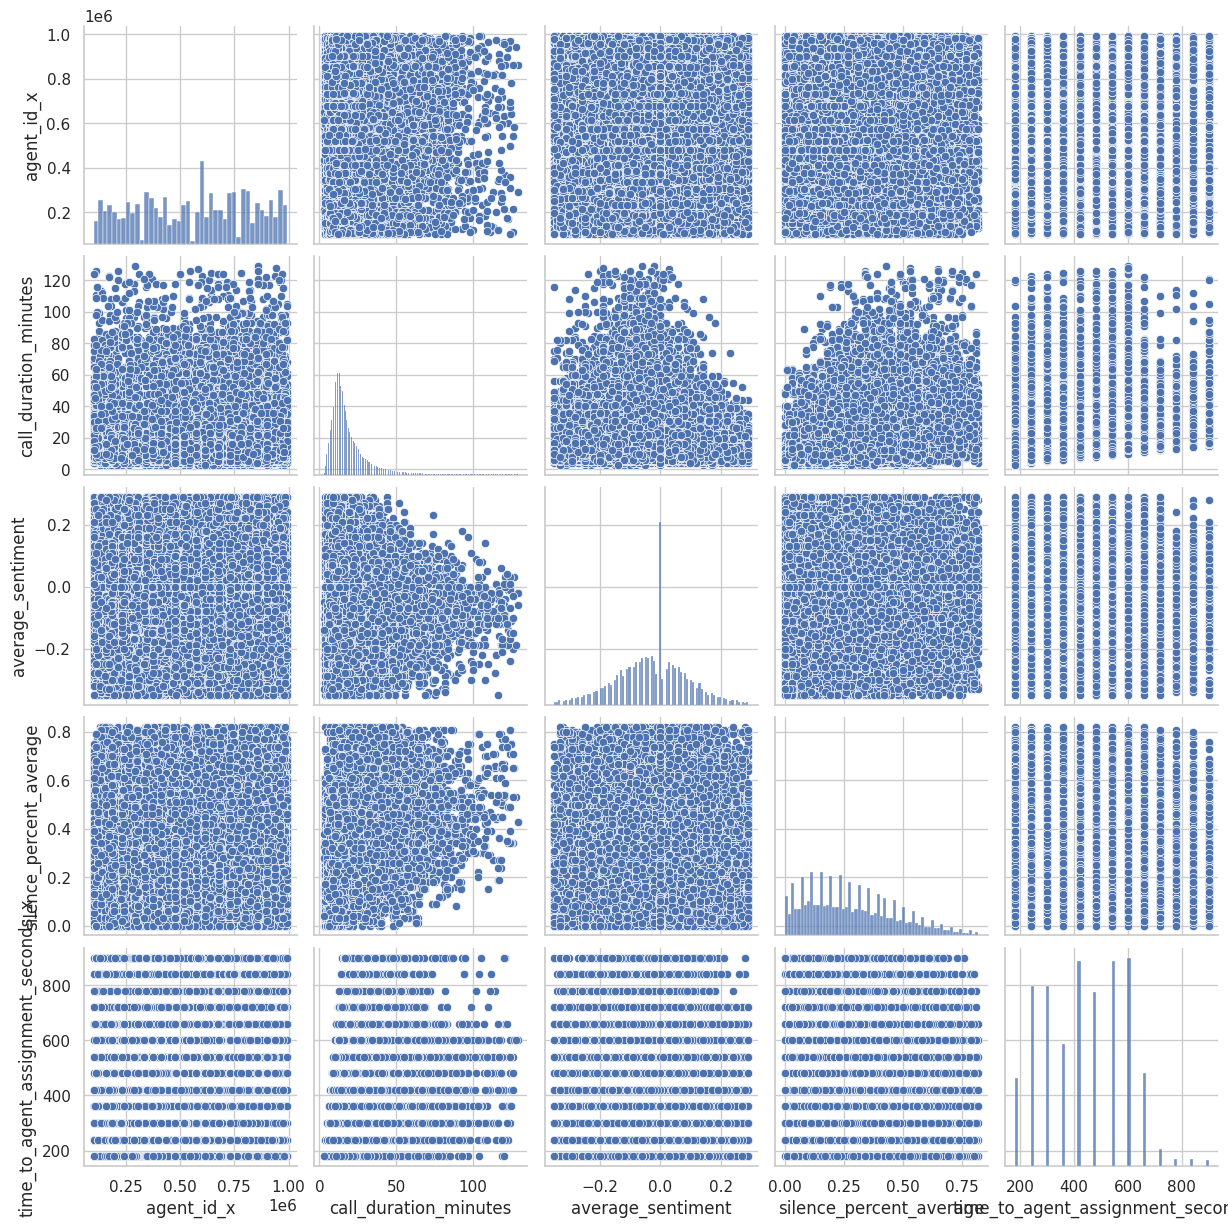

In [33]:
# For analysis lets make pairplot for this dataset

sns.pairplot(new_dataset)
plt.show()


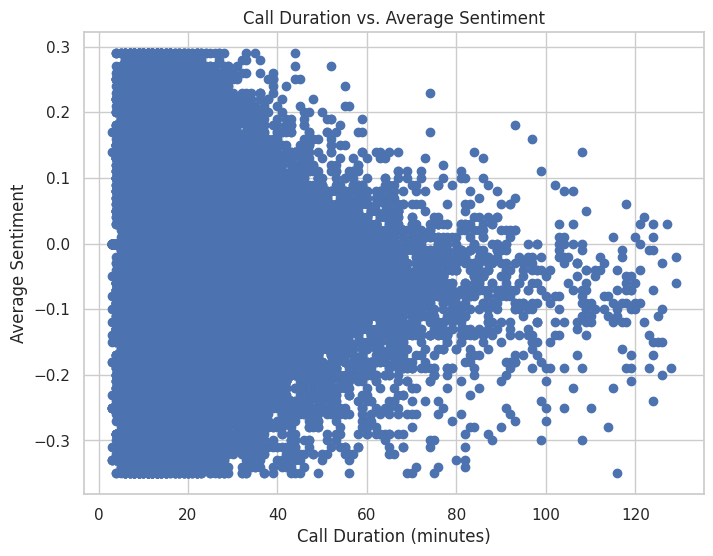

In [34]:
# prompt: give the plot between call_duration and average sentiment

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_call_senti_data['call_duration_minutes'], merged_call_senti_data['average_sentiment'])
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Average Sentiment')
plt.title('Call Duration vs. Average Sentiment')
plt.show()
